Sample data generated successfully.
Plot 1: Time series trend plot created.
Plot 2: Correlation heatmap created.
Plot 3: Decade distribution violin plot created.


/tmp/ipython-input-3056746716.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='decade', y='valence', palette='pastel')


Plot 4: Popularity bubble chart created.

Displaying all plots... Close the plot windows to exit.


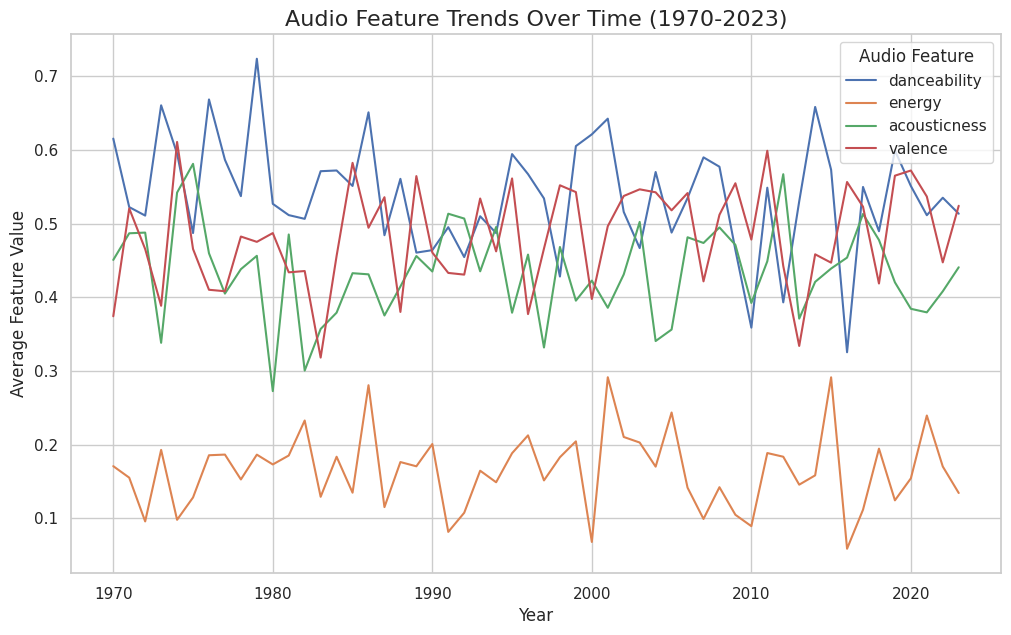

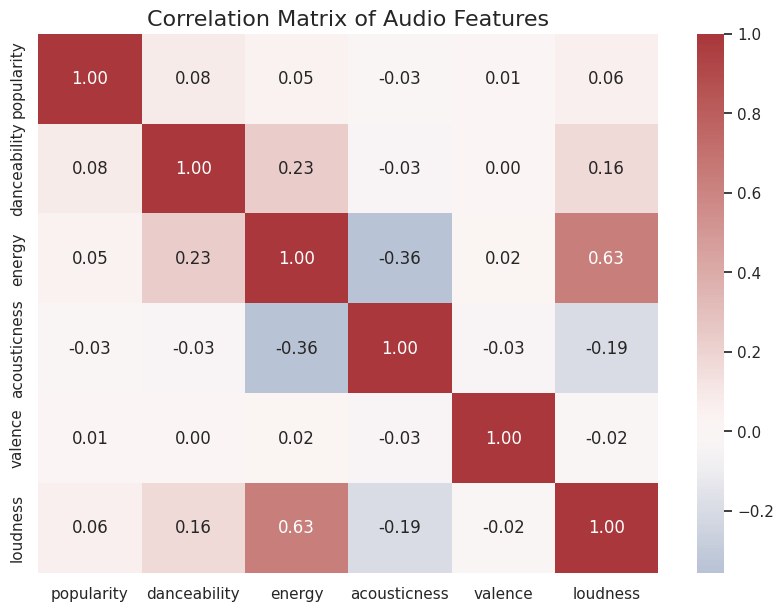

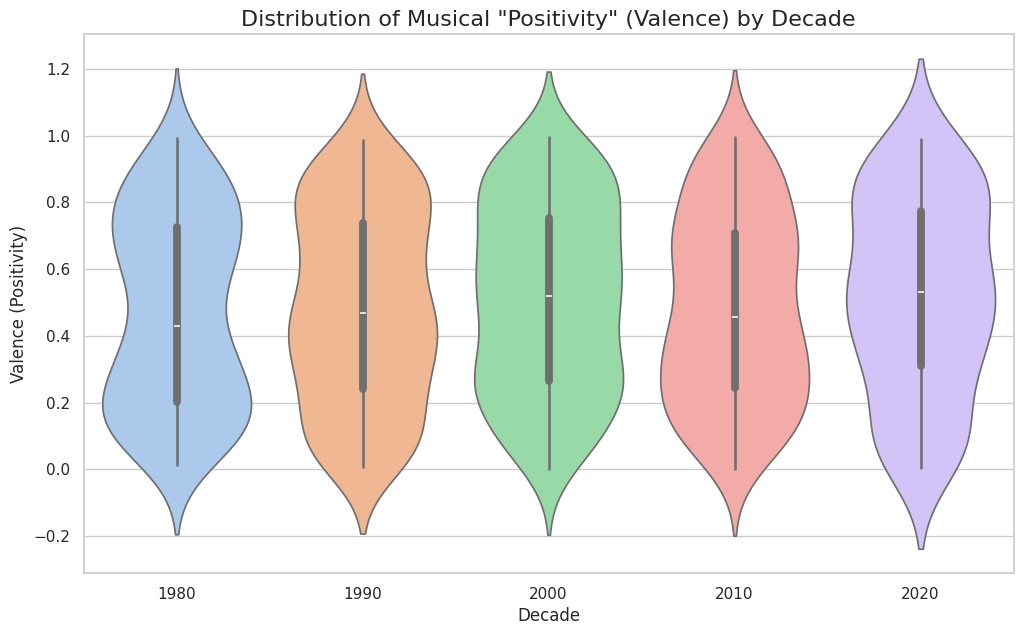

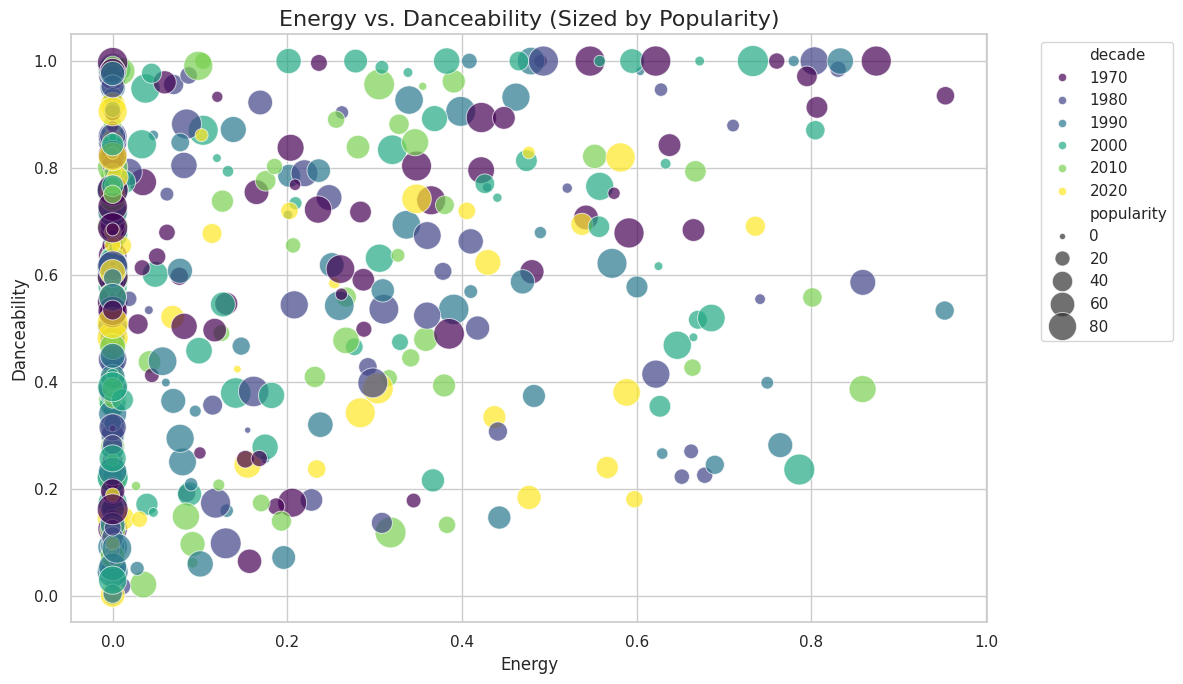

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_sample_data():
    """
    Generates a sample DataFrame of Spotify song features.
    In a real project, you would load this from a CSV.
    """
    # Generate data for 1000 songs
    num_songs = 1000
    np.random.seed(42) # for reproducible results

    data = {
        'year': np.random.randint(1970, 2024, num_songs),
        'popularity': np.random.randint(0, 100, num_songs),
        'danceability': np.random.rand(num_songs),
        'energy': np.random.rand(num_songs),
        'acousticness': np.random.rand(num_songs),
        'valence': np.random.rand(num_songs), # "positivity"
        'loudness': np.random.uniform(-60, 0, num_songs),
    }

    # Create some correlations (e.g., energetic songs are louder and less acoustic)
    data['energy'] = np.clip(data['energy'] + data['loudness'] / 60.0, 0, 1)
    data['acousticness'] = np.clip(data['acousticness'] - data['energy'] * 0.5, 0, 1)
    data['danceability'] = np.clip(data['danceability'] + data['energy'] * 0.3, 0, 1)

    df = pd.DataFrame(data)

    # Create a 'decade' column for easier grouping
    df['decade'] = (df['year'] // 10) * 10

    print("Sample data generated successfully.")
    return df

def plot_feature_trends(df):
    """
    Plot 1: Show average audio features over time (Time Series)
    """
    plt.figure(figsize=(12, 7))

    # Group by year and get the mean of these features
    trends = df.groupby('year')[['danceability', 'energy', 'acousticness', 'valence']].mean()

    sns.lineplot(data=trends, dashes=False)

    plt.title('Audio Feature Trends Over Time (1970-2023)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Feature Value', fontsize=12)
    plt.legend(title='Audio Feature')
    plt.grid(True)
    print("Plot 1: Time series trend plot created.")

def plot_correlation_heatmap(df):
    """
    Plot 2: Show correlation between all audio features (Heatmap)
    """
    plt.figure(figsize=(10, 7))

    # Select only the numeric features for correlation
    features = ['popularity', 'danceability', 'energy', 'acousticness', 'valence', 'loudness']
    corr_matrix = df[features].corr()

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='vlag', center=0)

    plt.title('Correlation Matrix of Audio Features', fontsize=16)
    print("Plot 2: Correlation heatmap created.")

def plot_decade_distribution(df):
    """
    Plot 3: Compare distribution of 'positivity' by decade (Violin Plot)
    """
    plt.figure(figsize=(12, 7))

    # Filter for a few decades to keep the plot clean
    decades_to_plot = [1980, 1990, 2000, 2010, 2020]
    df_filtered = df[df['decade'].isin(decades_to_plot)]

    sns.violinplot(data=df_filtered, x='decade', y='valence', palette='pastel')

    plt.title('Distribution of Musical "Positivity" (Valence) by Decade', fontsize=16)
    plt.xlabel('Decade', fontsize=12)
    plt.ylabel('Valence (Positivity)', fontsize=12)
    print("Plot 3: Decade distribution violin plot created.")

def plot_popularity_analysis(df):
    """
    Plot 4: Analyze relationship between features and popularity (Bubble Chart)
    """
    plt.figure(figsize=(12, 7))

    # Use a scatter plot with 'popularity' as the size of the bubbles
    sns.scatterplot(
        data=df.sample(500), # Sample 500 to avoid overplotting
        x='energy',
        y='danceability',
        size='popularity',
        hue='decade',
        palette='viridis',
        sizes=(20, 500), # Min and max bubble size
        alpha=0.7
    )

    plt.title('Energy vs. Danceability (Sized by Popularity)', fontsize=16)
    plt.xlabel('Energy', fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
    print("Plot 4: Popularity bubble chart created.")


def main():
    """
    Main function to load data and create all visualizations.
    """
    # Set the theme for all plots
    sns.set_theme(style="whitegrid")

    # Load the data
    df = get_sample_data()

    # --- Create the Plots ---
    plot_feature_trends(df)
    plot_correlation_heatmap(df)
    plot_decade_distribution(df)
    plot_popularity_analysis(df)

    # --- Show all plots ---
    print("\nDisplaying all plots... Close the plot windows to exit.")
    plt.tight_layout() # Adjust plots to prevent overlap
    plt.show()

if __name__ == "__main__":
    main()